In [109]:
def TP(In,Ep):
    import numpy as np
    Jx =0.05
    Jz=0.05
    w1=1
    w2=1
    wp=1
    TL=0.1
    TR=0.1
    gl=0.18
    vg=1
    wl=(gl*Ep)/vg
    Z2=np.zeros((15,15),dtype=complex)


    Z2[0][2]=-2J*wl
    Z2[0][3]=2j*Jx
    Z2[0][6]=-4j*Jx
    Z2[0][12]=4j*Jz


    Z2[1][2]=2j*wl
    Z2[1][7]=-2j*Jx
    Z2[1][10]=4j*Jx
    Z2[1][13]=-4j*Jz


    Z2[2][0]=-1j*wl
    Z2[2][1]=1j*wl
    Z2[2][2]=-2*TL
    Z2[2][5]=2j*Jx
    Z2[2][8]=-2j*Jx


    Z2[3][0]=2j*Jx
    Z2[3][6]=4j*Jz
    Z2[3][12]=-4j*Jx

    Z2[4][3]=1j*wl
    Z2[4][6]=-2j*wl

    Z2[5][2]=2j*Jx
    Z2[5][3]=-1j*wl
    Z2[5][5]=-1j*(w1-w2)-TL-TR
    Z2[5][6]=2j*wl
    Z2[5][11]=-2j*Jx

    Z2[6][4]=-1j*wl
    Z2[6][5]=1j*wl
    Z2[6][12]=-2j*Jx

    Z2[7][1]=-2j*Jx
    Z2[7][10]=-4j*Jz
    Z2[7][13]=4j*Jx

    Z2[8][2]=-2j*Jx
    Z2[8][7]=1j*wl
    Z2[8][8]=1j*(w1-w2)-TL-TR
    Z2[8][10]=-2j*wl
    Z2[8][11]=2j*Jx

    Z2[9][7]=-1j*wl
    Z2[9][10]=2j*wl

    Z2[10][8]=-1j*wl
    Z2[10][9]=1j*wl
    Z2[10][13]=2j*Jx

    Z2[11][5]=-2j*Jx
    Z2[11][8]=2j*Jx
    Z2[11][11]=-2*TR

    Z2[12][6]=-2J*Jx
    Z2[12][11]=1j*wl
    Z2[12][14]=-2J*wl

    Z2[13][10]=2j*Jx
    Z2[13][11]=-1j*wl
    Z2[13][14]=2j*wl

    Z2[14][12]=-1j*wl
    Z2[14][13]=1j*wl
    Z2[14][14]=-2*(TL+TR)

    dw1=w1-wp
    dw2=w2-wp
    Z2[0][0]=1j*dw1-TL
    Z2[1][1]=-1j*dw1-TL
    Z2[3][3]=1j*dw2-TR
    Z2[4][4]=1j*(dw1+dw2+4*Jz)-TL-TR
    Z2[6][6]=1j*(dw2+4*Jz)-2*TL-TR
    Z2[7][7]=-1j*dw2-TR
    Z2[9][9]=-1*(1j*(dw1+dw2+4*Jz)+TL+TR)
    Z2[10][10]=-1*(1j*(dw2+4*Jz)+2*TL+TR)
    Z2[12][12]=(1j*(dw1+4*Jz)-TL-2*TR)
    Z2[13][13]=-1*(1j*(dw1+4*Jz)+TL+2*TR)

    W=np.array([1j*wl,-1j*wl,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    from scipy.integrate import solve_ivp
    t=np.linspace(0,70,100)
    S0=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=complex)
    def S_t(t, S):
        return np.dot(Z2,S) + W
    sol = solve_ivp(S_t,[0,70], S0,t_eval=t)

    S22=np.array((sol.y[11]).real)
    S1=np.array((sol.y[1]).imag)
    S11=np.array((sol.y[2]).real)
    T2=(2*TR)/(vg*In)*S22
    R2=np.array([1]*100)+np.array((2*wl)/(vg*In)*S1)+np.array((2*TR)/(vg*In)*S11)
    
    return T2 , R2


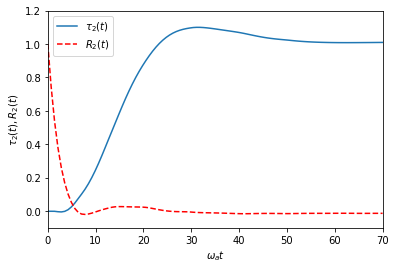

In [126]:
T2,R2=TP(1.6e-5,0.01)
import matplotlib.pyplot as plt
plt.plot(t,T2,label=r'$\tau_2(t)$')
plt.plot(t,R2,"r--",label=r'$R_2(t)$')
plt.axis([0,70,-0.1,1.2])
plt.xlabel(r'$\omega_a t$')
plt.ylabel(r'$\tau_2 (t),R_2(t)$')
plt.legend()
plt.show()

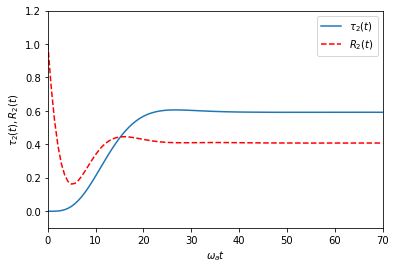

In [123]:
T2,R2=TP(0.04,0.5)
import matplotlib.pyplot as plt
plt.plot(t,T2,label=r'$\tau_2(t)$')
plt.plot(t,R2,"r--",label=r'$R_2(t)$')
plt.axis([0,70,-0.1,1.2])
plt.xlabel(r'$\omega_a t$')
plt.ylabel(r'$\tau_2 (t),R_2(t)$')
plt.legend()
plt.show()

In [63]:
def TP2(In,Ep):
    import numpy as np
    Jx =0.05
    Jz=0.05
    w1=1
    w2=1
    wp=1
    TL=0.1
    TR=0.1
    gl=0.18
    vg=1
    wl=(gl*Ep)/vg
    Z2=np.zeros((15,15),dtype=complex)


    Z2[0][2]=-2J*wl
    Z2[0][3]=2j*Jx
    Z2[0][6]=-4j*Jx
    Z2[0][12]=4j*Jz


    Z2[1][2]=2j*wl
    Z2[1][7]=-2j*Jx
    Z2[1][10]=4j*Jx
    Z2[1][13]=-4j*Jz


    Z2[2][0]=-1j*wl
    Z2[2][1]=1j*wl
    Z2[2][2]=-2*TL
    Z2[2][5]=2j*Jx
    Z2[2][8]=-2j*Jx


    Z2[3][0]=2j*Jx
    Z2[3][6]=4j*Jz
    Z2[3][12]=-4j*Jx

    Z2[4][3]=1j*wl
    Z2[4][6]=-2j*wl

    Z2[5][2]=2j*Jx
    Z2[5][3]=-1j*wl
    Z2[5][5]=-1j*(w1-w2)-TL-TR
    Z2[5][6]=2j*wl
    Z2[5][11]=-2j*Jx

    Z2[6][4]=-1j*wl
    Z2[6][5]=1j*wl
    Z2[6][12]=-2j*Jx

    Z2[7][1]=-2j*Jx
    Z2[7][10]=-4j*Jz
    Z2[7][13]=4j*Jx

    Z2[8][2]=-2j*Jx
    Z2[8][7]=1j*wl
    Z2[8][8]=1j*(w1-w2)-TL-TR
    Z2[8][10]=-2j*wl
    Z2[8][11]=2j*Jx

    Z2[9][7]=-1j*wl
    Z2[9][10]=2j*wl

    Z2[10][8]=-1j*wl
    Z2[10][9]=1j*wl
    Z2[10][13]=2j*Jx

    Z2[11][5]=-2j*Jx
    Z2[11][8]=2j*Jx
    Z2[11][11]=-2*TR

    Z2[12][6]=-2J*Jx
    Z2[12][11]=1j*wl
    Z2[12][14]=-2J*wl

    Z2[13][10]=2j*Jx
    Z2[13][11]=-1j*wl
    Z2[13][14]=2j*wl

    Z2[14][12]=-1j*wl
    Z2[14][13]=1j*wl
    Z2[14][14]=-2*(TL+TR)

    dw1=w1-wp
    dw2=w2-wp
    Z2[0][0]=1j*dw1-TL
    Z2[1][1]=-1j*dw1-TL
    Z2[3][3]=1j*dw2-TR
    Z2[4][4]=1j*(dw1+dw2+4*Jz)-TL-TR
    Z2[6][6]=1j*(dw2+4*Jz)-2*TL-TR
    Z2[7][7]=-1j*dw2-TR
    Z2[9][9]=-1*(1j*(dw1+dw2+4*Jz)+TL+TR)
    Z2[10][10]=-1*(1j*(dw2+4*Jz)+2*TL+TR)
    Z2[12][12]=(1j*(dw1+4*Jz)-TL-2*TR)
    Z2[13][13]=-1*(1j*(dw1+4*Jz)+TL+2*TR)

    W=np.array([1j*wl,-1j*wl,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    from scipy.integrate import solve_ivp
    t=np.linspace(0,70,100)
    S0=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=complex)
    def S_t(t, S):
        return np.dot(Z2,S) + W
    sol = solve_ivp(S_t,[0,70], S0,t_eval=t)

    S22=np.array((sol.y[11]).real)
    S11=np.array((sol.y[2]).real)
    
    return S22 ,S11

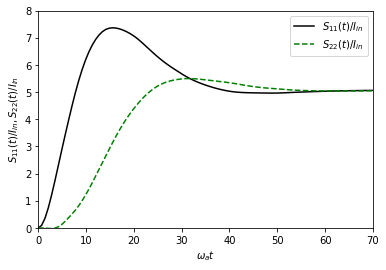

In [104]:
S22,S11=TP2(1.6e-5,0.01)
In=1.6e-5
import matplotlib.pyplot as plt
plt.plot(t,S11/In,"k",label=r'$S_{11}(t)/I_{in}$')
plt.plot(t,S22/In,"g--",label=r'$S_{22}(t)/I_{in}$')
plt.xlabel(r'$\omega_a t$')
plt.ylabel(r'$S_{11}(t)/I_{in} , S_{22}(t)/I_{in}$')
plt.axis([0,70,0,8])
plt.legend()
plt.show()

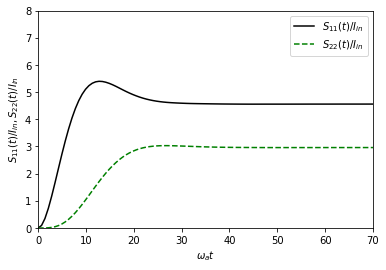

In [105]:
S22,S11=TP2(0.04,0.5)
In=0.04
import matplotlib.pyplot as plt
plt.plot(t,S11/In,"k",label=r'$S_{11}(t)/I_{in}$')
plt.plot(t,S22/In,"g--",label=r'$S_{22}(t)/I_{in}$')
plt.xlabel(r'$\omega_a t$')
plt.ylabel(r'$S_{11}(t)/I_{in} , S_{22}(t)/I_{in}$')
plt.axis([0,70,0,8])
plt.legend()
plt.show()